In [107]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import pickle
import os

from amftrack.util.sys import (

    update_plate_info,

    get_current_folders,
)

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.post_processing.exp_plot import *
import pickle
import scipy.io as sio
import networkx as nx
import numpy as np
from sthype import SpatialGraph, HyperGraph
from sthype.graph_functions import spatial_temporal_graph_from_spatial_graphs

import matplotlib.pyplot as plt
import os
import pickle
from tqdm import tqdm
import pandas as pd
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_all_edges,
    get_all_nodes, get_timedelta_second,
)
from amftrack.pipeline.functions.transport_processing.high_mag_videos.temporal_graph_util import *
mpl.rcParams["figure.dpi"] = 100
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
path_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\graphs"
plates = [
    "441_20230807", "449_20230807", "310_20230830"
]
plate_id = plates[1]
path_tot = os.path.join(path_root,f"graph{plate_id}_video.pickle")
spatial_temporal_graph,folders = load(path_tot)

In [121]:
def merge_hyperedge(hyperdege0,hyperedge1,graph):
    edges = graph.get_hyperedge_edges(hyperedge1)
    edges_new = merge(edges, graph)
    for u,v in edges_new:
        graph[u][v]["hyperedge"] = hyperdege0
# #441
        
# merge_hyperedge(3169,3728,spatial_temporal_graph)
# merge_hyperedge(3169,3874,spatial_temporal_graph)
#310

merge_hyperedge(221,263,spatial_temporal_graph)
merge_hyperedge(221,445,spatial_temporal_graph)
merge_hyperedge(221,579,spatial_temporal_graph)
merge_hyperedge(221,1243,spatial_temporal_graph)
merge_hyperedge(697,672,spatial_temporal_graph)
merge_hyperedge(697,480,spatial_temporal_graph)
merge_hyperedge(697,4824,spatial_temporal_graph)
merge_hyperedge(697,1301,spatial_temporal_graph)
merge_hyperedge(1244,1224,spatial_temporal_graph)
merge_hyperedge(1244,1333,spatial_temporal_graph)
merge_hyperedge(1244,4852,spatial_temporal_graph)


In [122]:
exp = make_exp(spatial_temporal_graph,folders)
weights = {(begin, end): LineString(data['pixel_list']).length * 1.725 for begin, end, data in
           spatial_temporal_graph.edges(data=True)}
nx.set_edge_attributes(spatial_temporal_graph, weights, "length")
weights = {(begin, end): data['pixel_list'][0][0] * 1.725 for begin, end, data in
           spatial_temporal_graph.edges(data=True)}
nx.set_edge_attributes(spatial_temporal_graph, weights, "x")
weights = {(begin, end): data['pixel_list'][0][1] * 1.725 for begin, end, data in
           spatial_temporal_graph.edges(data=True)}
nx.set_edge_attributes(spatial_temporal_graph, weights, "y")
# weights = {(begin, end): np.abs(data["42"]['speed_backflow2']) for begin, end, data in
#            spatial_temporal_graph.edges(data=True)}
# nx.set_edge_attributes(spatial_temporal_graph, weights, "abs_speed_backflow2_42")
# spatial_temporal_graph._hyperedges_initial_edges_gathered = True
get_abcisse(spatial_temporal_graph)

In [68]:
np.max(list(weights.values()))

0

In [123]:
refs = {
    "310_20230830": {
        "20230901_Plate310": "20230901_0719_Plate06",
        "20230902_Plate310": "20230902_1343_Plate07",
        "20230903_Plate310": "20230903_1143_Plate07",
        "20230904_Plate310": "20230904_0942_Plate07",
        "20230905_Plate310": "20230905_1345_Plate07",
        # "20230906_Plate310" : "20230906_1220_Plate07",
    },
    "441_20230807": {
        "20230810_Plate441": "20230810_1005_Plate14",
        "20230811_Plate441": "20230811_1605_Plate14",
        "20230812_Plate441": "20230812_1006_Plate14",
        "20230813_Plate441": "20230813_1618_Plate14",
    },
    "449_20230807": {
        "20230813_Plate449": "20230813_1606_Plate10",
        "20230814_Plate449": "20230814_1019_Plate10",
        "20230815_Plate449": "20230815_1021_Plate10",
        "20230816_Plate449": "20230816_1027_Plate10",
        # "20230818_Plate449": "20230818_1107_Plate10",
    },
}
indexes = refs[plate_id]

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 249600000 bytes in function 'cv::OutOfMemoryError'


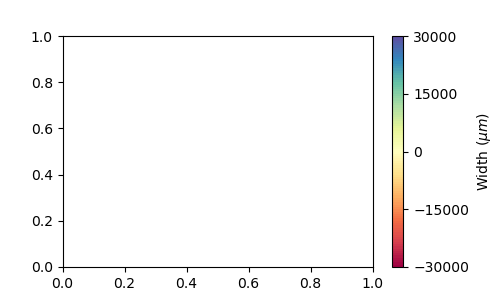

In [124]:
plt.close("all")
def color_edge(edge):
    if (edge.get_attribute("hyperedge",t) ==1444):
        return((30000-edge.get_attribute("x",t)))
    else:
        return(-30000)
exp = make_exp(spatial_temporal_graph,folders)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_edge_color_value,
)
from matplotlib import cm

vmax = 30000
vmin = -30000
t=0
# region = [[3000*5,5000*5],[5250*5,7500*5]]
region = [[0*5,0*5],[30000,52000]]

plot_edge_color_value(
    exp,
    t,
    lambda edge : color_edge(edge),
    # lambda edge : edge.get_attribute("y",t),
    
    cmap=cm.get_cmap("Spectral", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=30,
    figsize=(5, 3),
    alpha = 1,
    region = region
)

In [27]:
def check_has_video(edge,graph):
    for i in range(graph.max_age+1):
        if 'video_edge' in graph[edge[0]][edge[1]][str(i)]:
            return(True)
    return(False)

In [100]:
edges_info = [edge for edge in spatial_temporal_graph.edges() if check_has_video(edge,spatial_temporal_graph)]

In [101]:
all_infos = pd.DataFrame()
attribute_list = ["QBC_tot","QBC_net","water_flux","speed_backflow","speed_heaton","water_flux_heaton","speed_backflow2"]
static_atrribute = ["hyperedge",
                    "abcisse",
                    "x",
                    "y",
                   ]
edge_specific_attribute = ["ordered_mapping","R","mapping"]
iss = []
for edge in edges_info:
    for i in range(spatial_temporal_graph.max_age+1):
         if 'video_edge' in spatial_temporal_graph[edge[0]][edge[1]][str(i)]:
            if i not in iss:
                iss.append(i)
                # print(i,spatial_temporal_graph[edge[0]][edge[1]][str(i)]['video_edge'])
            network_edge_infos = spatial_temporal_graph[edge[0]][edge[1]]
            for j in range(len(network_edge_infos[str(i)]['video_edge'])):
                edge_obj = spatial_temporal_graph[edge[0]][edge[1]][str(i)]['video_edge'][j]
                x1 = spatial_temporal_graph.nodes[edge[0]]['position'].x
                x2 = spatial_temporal_graph.nodes[edge[1]]['position'].x
                for attribute in attribute_list:
                    if attribute in network_edge_infos[str(i)]:
                        edge_obj.mean_data[attribute]=network_edge_infos[str(i)][attribute]
                for attribute in edge_specific_attribute:
                    edge_obj.mean_data[attribute]=network_edge_infos[str(i)][attribute][j]
                for attribute in static_atrribute:
                    if attribute in network_edge_infos:
                        edge_obj.mean_data[attribute]=network_edge_infos[attribute]
                edge_data_csv = edge_obj.mean_data
                edge_data_csv['folder'] = folders["folder"].iloc[i]
                edge_data_csv['edge_network'] = edge

                if "water_flux" in edge_data_csv.keys():
                    edge_data_csv['ordered_final'] = -edge_data_csv['ordered_mapping']

                    edge_data_csv['ordered_final'] *= (1-2*(edge[0]>edge[1]))
                    edge_data_csv['ordered_final'] *= (1-2*(x1>x2))
                    # edge_data_csv['ordered_final'] *= (1-2*(edge_data_csv['water_flux']>0))

                edge_data_csv = pd.DataFrame(edge_data_csv).transpose()
                all_infos = pd.concat([all_infos,edge_data_csv])
    # break

In [103]:
all_infos['abcisse'] = all_infos['abcisse'].astype(float)
all_infos['negx'] = 40000-all_infos['x']
all_infos['negy'] = 50000-all_infos['y']

(-7.0, 7.0)

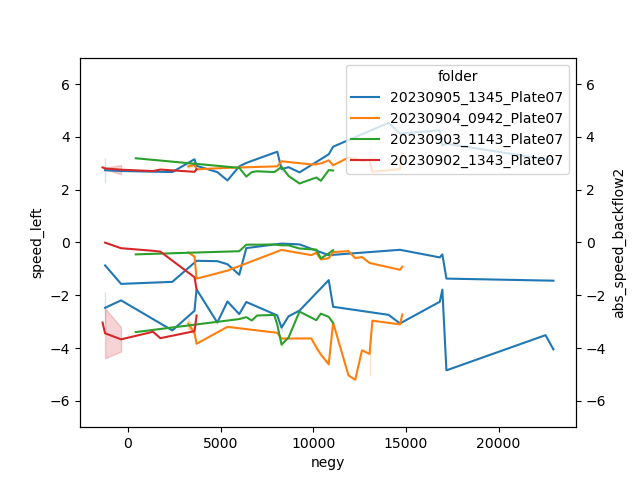

In [112]:
fig,ax = plt.subplots()
all_infos["ordered_heaton"] = all_infos['ordered_final']*(1-2*(all_infos['speed_heaton']>0))
all_infos["ordered_backflow"] = all_infos['ordered_final']*(1-2*(all_infos['speed_backflow2']>0))
all_infos["abs_speed_backflow2"] = -np.abs(all_infos['speed_backflow2'])
all_infos["abs_speed_heaton"] = np.abs(all_infos['speed_heaton'])*10


select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]
select = select[select['hyperedge']==31]
sns.lineplot(select,x="negy",y="speed_left",hue = 'folder')
sns.lineplot(select,x="negy",y="speed_right",hue = 'folder')
ax.set_ylim(-7,7)
plt.gca().get_legend().remove()  # This removes the legend
# # sns.lineplot(select,x="negx",y="speed_left",hue = 'folder')
ax2 = ax.twinx()
selectm = select[select['ordered_backflow']==-1]
# sns.lineplot(selectm,x = "negy",y= "abs_speed_heaton",hue = "folder",ax = ax2)
sns.lineplot(selectm,x = "negy",y= "abs_speed_backflow2",hue = "folder",ax = ax2)
ax2.set_ylim(-7,7)


(-7.0, 7.0)

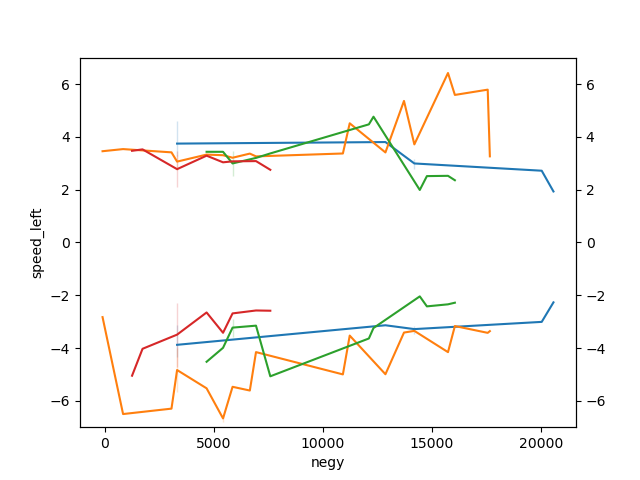

In [119]:
fig,ax = plt.subplots()
all_infos["ordered_heaton"] = all_infos['ordered_final']*(1-2*(all_infos['speed_heaton']>0))
all_infos["ordered_backflow"] = all_infos['ordered_final']*(1-2*(all_infos['speed_backflow2']>0))
all_infos["abs_speed_backflow2"] = -np.abs(all_infos['speed_backflow2'])
all_infos["abs_speed_heaton"] = np.abs(all_infos['speed_heaton'])*10


select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]
select = select[select['hyperedge']==167]
sns.lineplot(select,x="negy",y="speed_left",hue = 'folder')
sns.lineplot(select,x="negy",y="speed_right",hue = 'folder')
ax.set_ylim(-7,7)
plt.gca().get_legend().remove()  # This removes the legend

# # sns.lineplot(select,x="negx",y="speed_left",hue = 'folder')
ax2 = ax.twinx()
selectm = select[select['ordered_backflow']==-1]
# sns.lineplot(selectm,x = "negy",y= "abs_speed_heaton",hue = "folder",ax = ax2)
# sns.lineplot(selectm,x = "negy",y= "abs_speed_backflow2",hue = "folder",ax = ax2)
ax2.set_ylim(-7,7)


In [114]:
select

,Unnamed: 0,edge_name,edge_length,straight_length,speed_max,speed_min,speed_mean,flux_avg,flux_min,flux_max,...,speed_heaton,water_flux_heaton,speed_backflow2,ordered_final,ordered_heaton,ordered_backflow,abs_speed_backflow2,abs_speed_heaton,negx,negy
0,0,"(2, 0)",76.728,77.081864,6.834109,-8.335698,0.694224,18.1559,-65.203297,114.285271,...,-0.139704,-6.445479,1.397037,1,1,-1,-1.397037,1.397037,8101.357108,-2952.694611
0,0,"(6, 2)",59.892,59.789844,5.896593,-9.591835,1.057395,32.868126,-99.926176,156.657157,...,-0.111223,-5.06507,0.676889,1,1,-1,-0.676889,1.112226,8101.357108,-2952.694611
0,0,"(5, 2)",24.426,24.313078,7.892479,-11.116576,0.810491,16.516832,-68.129278,112.223515,...,0.170745,7.287843,-1.707449,-1,1,-1,-1.707449,1.707449,8101.357108,-2952.694611
0,0,"(13, 6)",42.228,42.09362,6.306771,-12.394759,1.132422,17.084203,-52.438613,79.742611,...,0.122086,5.751799,-0.750165,-1,1,-1,-0.750165,1.22086,8101.357108,-2952.694611
0,0,"(3, 0)",61.686,49.412865,7.946882,-9.840812,-0.17092,-2.296233,-82.772393,64.248276,...,0.136345,5.327086,-0.647761,-1,1,-1,-0.647761,1.363448,11741.572816,-2799.512756
0,0,"(10, 3)",65.55,66.479916,7.542199,-8.205276,-0.397125,-8.722894,-111.189226,77.121971,...,0.087542,4.483674,-0.504813,-1,1,-1,-0.504813,0.875422,11667.388001,-2802.744838
0,0,"(11, 0)",104.328,105.96612,6.69026,-9.261602,-0.310028,-4.703157,-142.644357,117.189384,...,0.087542,4.483674,-0.504813,-1,1,-1,-0.504813,0.875422,11667.388001,-2802.744838
0,0,"(57, 38)",46.092,45.989005,6.520007,-6.51487,-0.217102,-4.140681,-72.414624,60.074396,...,0.143741,6.445479,-1.43741,-1,1,-1,-1.43741,1.43741,8935.016266,-2994.81882
0,0,"(38, 2)",52.854,52.730629,5.752931,-6.576943,0.110788,2.741104,-54.614435,60.918816,...,0.121506,5.636689,-1.21506,-1,1,-1,-1.21506,1.21506,9526.028665,-3015.530118


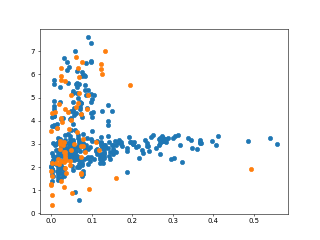

In [41]:
fig,ax = plt.subplots()
all_infos["ordered_heaton"] = all_infos['ordered_final']*(1-2*(all_infos['speed_heaton']>0))
select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]

selectm = select[select['ordered_heaton']==1]
ax.scatter(np.abs(selectm["speed_heaton"]),selectm["speed_right"])
selectp = select[select['ordered_heaton']==-1]

ax.scatter(np.abs(selectp["speed_heaton"]),-selectp["speed_left"])

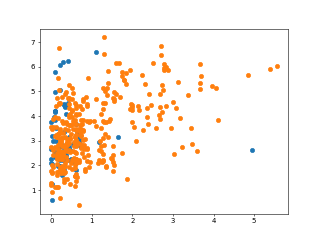

In [42]:
fig,ax = plt.subplots()
all_infos["ordered_backflow"] = all_infos['ordered_final']*(1-2*(all_infos['speed_backflow2']>0))
select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]

selectm = select[select['ordered_backflow']==1]
ax.scatter(np.abs(selectm["speed_backflow2"]),selectm["speed_right"])
selectp = select[select['ordered_backflow']==-1]

ax.scatter(np.abs(selectp["speed_backflow2"]),-selectp["speed_left"])

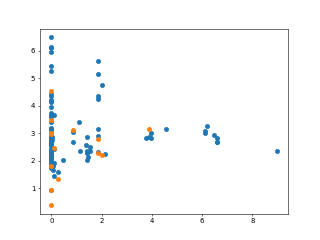

In [43]:
fig,ax = plt.subplots()
all_infos["ordered_Cflux"] = all_infos['ordered_final']*(1-2*(all_infos['QBC_net']>0))
select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]
select = select[np.abs(select['QBC_net'])>0]

selectm = select[select['ordered_Cflux']==-1]
ax.scatter(np.abs(selectm["QBC_net"]),selectm["speed_right"])
selectp = select[select['ordered_Cflux']==1]

ax.scatter(np.abs(selectp["QBC_net"]),-selectp["speed_left"])

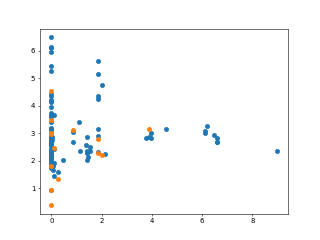

In [43]:
fig,ax = plt.subplots()
all_infos["ordered_Cflux"] = all_infos['ordered_final']*(1-2*(edge_data_csv['QBC_net']>0))
select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]
select = select[np.abs(select['QBC_net'])>0]

selectm = select[select['ordered_Cflux']==-1]
ax.scatter(np.abs(selectm["QBC_net"]),selectm["speed_right"])
selectp = select[select['ordered_Cflux']==1]

ax.scatter(np.abs(selectp["QBC_net"]),-selectp["speed_left"])

In [31]:
len(select["ordered_heaton"])

109

In [23]:
select = select[np.abs(select['ordered_final'])>0]
len(selectm)+len(selectp)

28

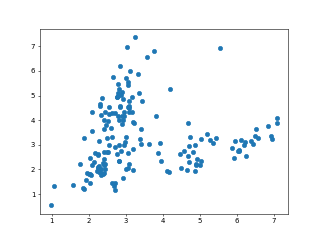

In [43]:
fig,ax = plt.subplots()
all_infos['speed_left_abs'] = np.abs(all_infos['speed_left'])
all_infos['max_speed'] = all_infos[['speed_right', 'speed_left_abs']].max(axis=1)
all_infos['min_speed'] = all_infos[['speed_right', 'speed_left_abs']].min(axis=1)
select = all_infos[all_infos['mapping']<100]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]
# selectm = select[select['ordered_final']==-1]

ax.scatter(abs(select["speed_right"]),abs(select["speed_left_abs"]))

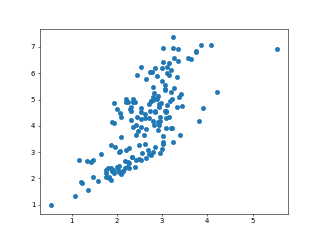

In [41]:
fig,ax = plt.subplots()
all_infos['speed_left_abs'] = np.abs(all_infos['speed_left'])
all_infos['max_speed'] = all_infos[['speed_right', 'speed_left_abs']].max(axis=1)
all_infos['min_speed'] = all_infos[['speed_right', 'speed_left_abs']].min(axis=1)
select = all_infos[all_infos['mapping']<100]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]
# selectm = select[select['ordered_final']==-1]

ax.scatter(abs(select["min_speed"]),abs(select["max_speed"]))

<AxesSubplot: xlabel='water_flux', ylabel='speed_left'>

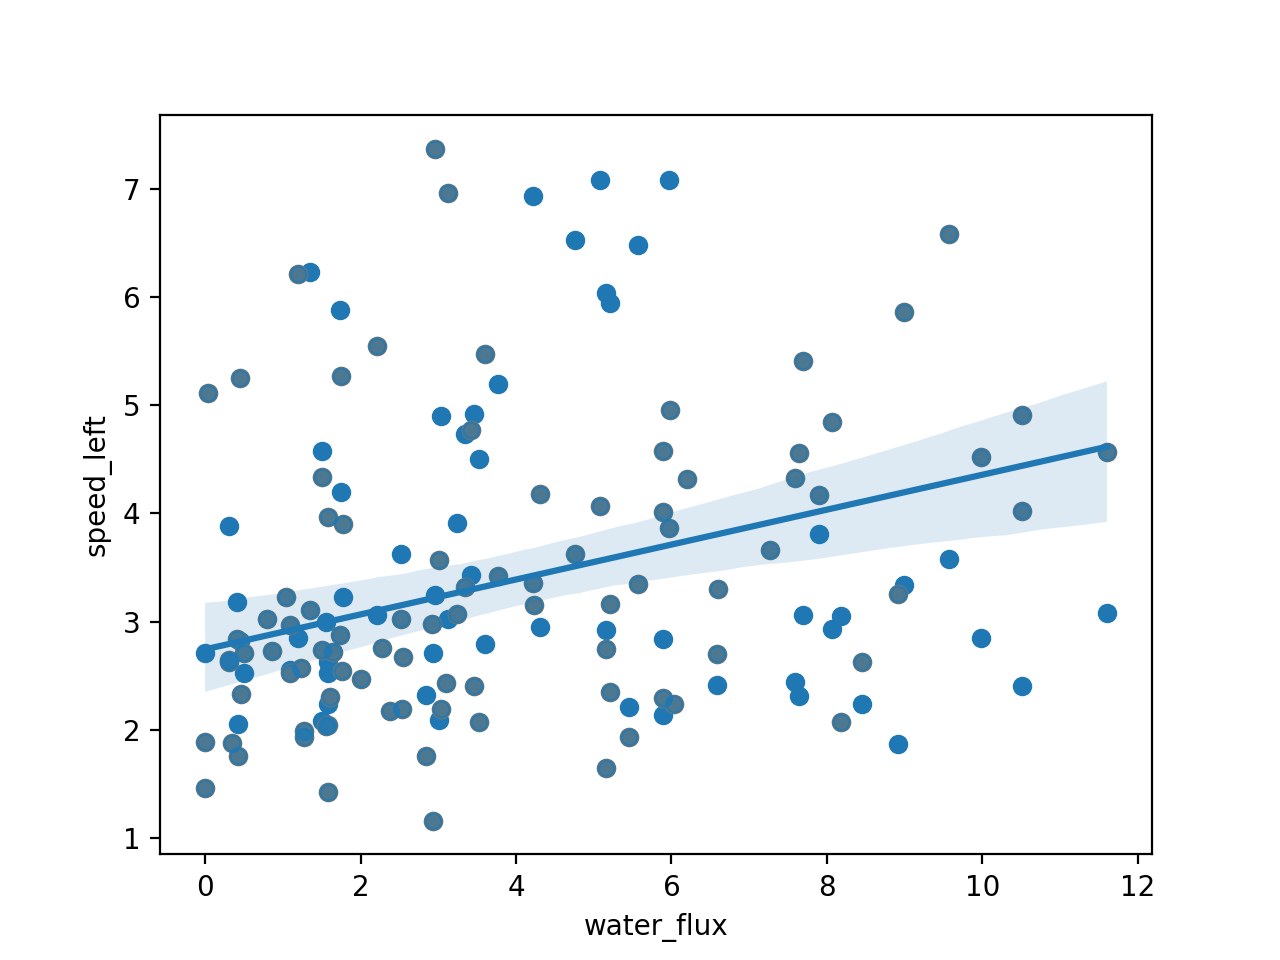

In [8]:
fig,ax = plt.subplots()
select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['mode']=="BF"]
selectm = select[select['ordered_final']==1]

ax.scatter(np.abs(selectm["water_flux"]),selectm["speed_right"])
selectp = select[select['ordered_final']==-1]
selectp = select[select['speed_left']<0]

ax.scatter(np.abs(selectp["water_flux"]),np.abs(selectp["speed_left"]))
sns.regplot(x = np.abs(selectp["water_flux"]).astype("float"),y=np.abs(selectp["speed_left"]).astype("float"))

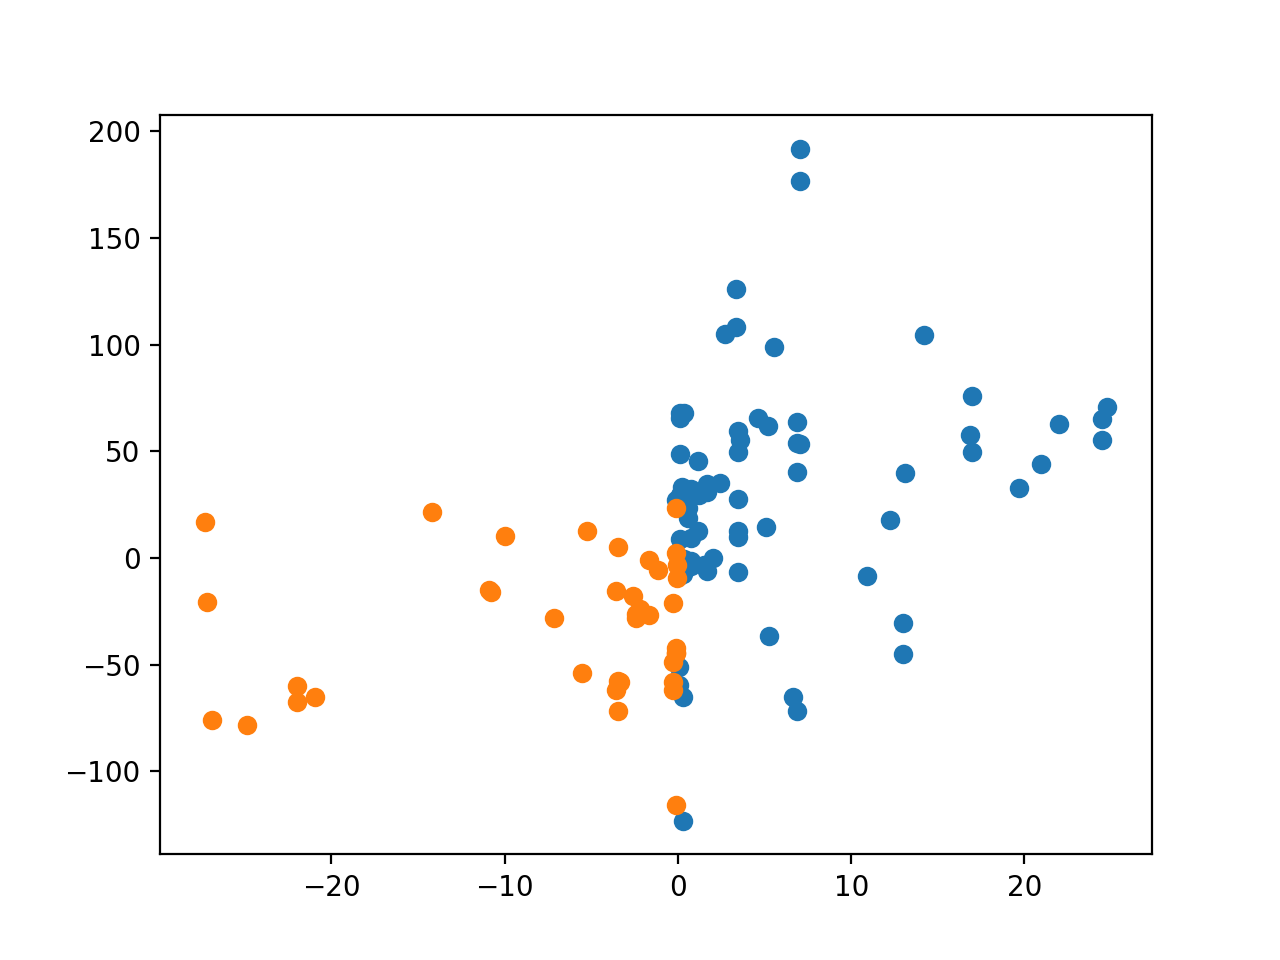

In [9]:
fig,ax = plt.subplots()
select = all_infos[all_infos['mapping']<10]
select = select[select['coverage_tot']>=0.1]
select = select[select['QBC_tot']>0]

select = select[select['mode']=="F"]
selectm = select[select['ordered_final']==1]

ax.scatter(selectm["QBC_net"],selectm["flux_avg"])
selectp = select[select['ordered_final']==-1]
# selectp = select[select['speed_left']<0]

ax.scatter(selectp["QBC_net"],-selectp["flux_avg"])


In [10]:
np.sign((all_infos['flux_avg']*all_infos["QBC_net"]*all_infos["ordered_final"]).astype(float))

0    NaN
0    0.0
0    0.0
0    1.0
0    0.0
    ... 
0    0.0
0    0.0
0    0.0
0    1.0
0    1.0
Length: 645, dtype: float64

In [11]:
all_infos['aligned'] = np.sign((all_infos['flux_avg']*all_infos["QBC_net"]*all_infos["ordered_final"]).astype(float))

KeyError: 'aligned'

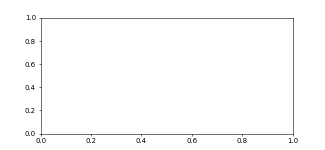

In [44]:
# Assuming 'select' is your DataFrame filtered based on previous conditions.
plate_ids = all_infos['plate_id'].unique()
plate_ids_names = [plate_id.split("_")[0] for plate_id in plate_ids]
num_plate_ids = len(plate_ids)

# Prepare figure
fig, ax = plt.subplots(figsize=(10/2 + num_plate_ids/2, 3))  # Adjust figure size based on the number of plate_ids

# Bar plot settings
bar_width = 0.2
index = np.arange(num_plate_ids)
color_1 = 'orange'
color_2 = 'green'

# Initialize containers for bar positions and heights
positions_1 = []
positions_2 = []
heights_1 = []
heights_2 = []

# Loop through each plate_id to get proportions
for i, plate_id in enumerate(plate_ids):
    subset = all_infos[all_infos['plate_id'] == plate_id]
    subset = subset[(subset['coverage_tot'] > 0.05) & 
               (subset['speed_right'] <= 15) & 
               (subset['mode'] <= "F") & 
               (subset['mapping'] <= 10) &
               (subset['QBC_tot'] > 0) 
                    
                   ]
    aligned_counts = subset['aligned'].value_counts(normalize=True).reindex([-1, 1], fill_value=0) * 100
    # aligned2_counts = subset['aligned2'].value_counts(normalize=True).reindex([-1, 1], fill_value=0) * 100
    
    # Plot bars for this plate_id
    pos_1 = index[i] - bar_width/1.5
    pos_2 = index[i] + bar_width/1.5
    
    positions_1.append(pos_1)
    positions_2.append(pos_2)
    heights_1.extend([aligned_counts[-1], aligned_counts[1]])
    # heights_2.extend([aligned2_counts[-1], aligned2_counts[1]])
    
    ax.bar(pos_1, aligned_counts[-1], bar_width, label='-1 in Aligned' if i == 0 else "", color=color_1)
    ax.bar(pos_1, aligned_counts[1], bar_width, bottom=aligned_counts[-1], label='1 in Aligned' if i == 0 else "", color=color_2)
    
#     ax.bar(pos_2, aligned2_counts[-1], bar_width, label='-1 in Aligned2' if i == 0 else "", color=color_1,hatch = "/")
#     ax.bar(pos_2, aligned2_counts[1], bar_width, bottom=aligned2_counts[-1], label='1 in Aligned2' if i == 0 else "", color=color_2,hatch = "/")

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('date')
ax.set_ylabel('Percentage')
# ax.set_title('Proportion of -1 and 1 in Aligned and Aligned2 by Plate ID')
ax.set_xticks(index)
ax.set_xticklabels(plate_ids_names, rotation=45)
ax.set_ylim(0, 100)
ax.hlines(50,-bar_width*1.5,len(index)-1+bar_width*1.5,color="black",linestyle="dashed")
# ax.legend()

plt.tight_layout()
plt.show()

In [13]:
selectm.iloc[0]['folder']

'20230811_1605_Plate14'

In [14]:
selectm.iloc[0]['video_int']

106

In [15]:
selectm.iloc[0]['speed_right']

3.281096

In [16]:
selectm.iloc[0]['edge_name']

'(2, 0)'

In [17]:
len(selectm)+len(selectp)

108

In [18]:
selectm['folder'].unique()

array(['20230811_1605_Plate14', '20230812_1006_Plate14',
       '20230810_1005_Plate14'], dtype=object)

In [19]:
select = all_infos.loc[all_infos['video_int']==52]
select = select.loc[select['edge_name']=="(33, 9)"]
select['water_flux'],select['speed_left'],select['speed_right'],select["ordered_final"]

(0   -8.920919
 Name: water_flux, dtype: object,
 0   -3.258193
 Name: speed_left, dtype: object,
 0    1.875634
 Name: speed_right, dtype: object,
 0    1
 Name: ordered_final, dtype: object)

In [20]:
select['ordered_mapping'],select['edge_network']

(0    -1
 Name: ordered_mapping, dtype: object,
 0    (181405, 181410)
 Name: edge_network, dtype: object)

In [21]:
edge = select['edge_network'].iloc[0]
edge

(181405, 181410)

In [22]:
x1 = spatial_temporal_graph.nodes[edge[0]]['position'].x
x2 = spatial_temporal_graph.nodes[edge[1]]['position'].x
x1,x2

(23663.061482934827, 23695.433517386053)

In [23]:
nodes = [Node(label,exp) for label in select['edge_network'].iloc[0]]
nodes

[Node(181405), Node(181410)]

In [24]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.plotting import *
from matplotlib import cm
downsizing = 5
t=0

fig, ax,f = plot_edge_color_value_3(
    exp,
    t,
    lambda edge : 2,
    cmap=cm.get_cmap("viridis", 100),
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(12, 9),
    alpha = 1,
    v_min = 0,
    v_max = 0.2,
    region = region,
    nodes = nodes

)

NameError: name 'region' is not defined

In [ ]:
all_infos['ordered']

In [ ]:
G = exp1.nx_graph[0]
speeds = [abs(G[u][v]['speed']) for u, v in G.edges()]
fluxes = [G[u][v]['QBC_net'] for u, v in G.edges()]
fig,ax = plt.subplots()
ax.hist(speeds,30)
# ax.hist(fluxes2,30,alpha = 0.5)
ax.set_yscale("log")

In [ ]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.plotting import *
from matplotlib import cm
downsizing = 5
t=0
region = [[0*5,0*5],[26000,52000]]

fig, ax,f = plot_edge_color_value_3(
    exp1,
    t,
    lambda edge : abs(edge.get_attribute("speed",t)),
    cmap=cm.get_cmap("viridis", 100),
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(5, 3),
    alpha = 1,
    v_min = 0,
    v_max = 0.2,
    region = region
    # nodes = non_zero

)

In [ ]:
region = [[3750*5,4500*5],[5250*5,8000*5]]

plot_region(exp1,region,"water_flux",0.3)